In [34]:
np.random.permutation(150)

array([107,  21, 112,  79, 148, 108,  99,  56,  71,  96, 149, 122,   4,
        34, 147,  65,  84,  51,  82,  55,   2,  83,   8, 125, 114, 123,
       128, 120,  37,  36,  98,  69,  54,  72,  97,  66,   9,  43, 115,
       106,  60,  94, 143,  48, 134,  45, 119,  61,  75,  15, 113,  33,
        11, 140, 103,  42, 131,  90, 133, 116,  31, 118,  68, 105, 127,
       129,  27, 144,  88, 117,  50,  28,  77,  13,  38,  86, 109,  80,
        46,  81, 137, 138,  76,  10,  59,  29,  93,  62,  78, 100,  30,
        41,  58,  57,  26,  12, 121,  22,  23,   6, 136,   5, 139,  17,
        74,  70, 132,  91,  89,  39, 111,  64, 145,  16, 146,  52,  40,
       124, 130,  53,   1, 110,  20,  32, 135, 142,  14,   7, 141,  92,
       101,  19,  49,  18,  63,  85, 126,  24,   0,  73,  87,   3,  35,
        44, 102,  47,  25,  67, 104,  95])

In [35]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
sel = np.random.permutation(150)
clf = clf.fit(X[sel[:120]], y[sel[:120]])

In [25]:
import matplotlib.pyplot as plt

[Text(418.5, 747.4499999999999, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(354.11538461538464, 611.55, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(482.8846153846154, 611.55, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(257.53846153846155, 475.65, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(128.76923076923077, 339.74999999999994, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(64.38461538461539, 203.8499999999999, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(193.15384615384616, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 339.74999999999994, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 203.8499999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 203.8499999999999, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.30769230

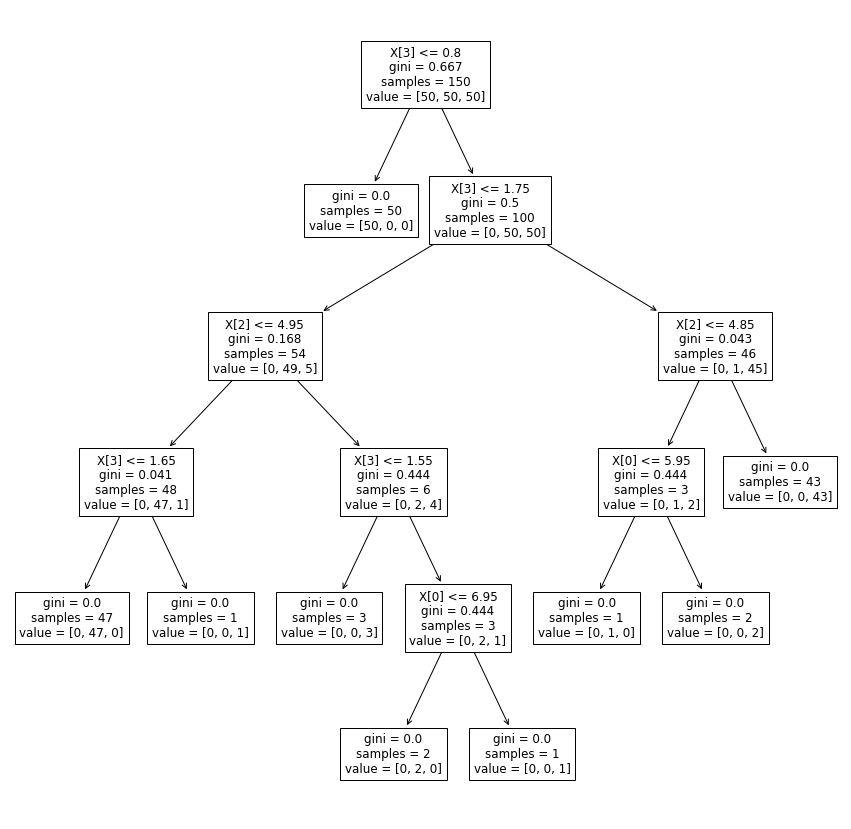

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(clf) 

In [27]:
X.shape

(150, 4)

In [36]:
y_pred = clf.predict(X[sel[120:]])

In [38]:
len(y[sel[120:]])

30

In [39]:
29/30 * 100

96.66666666666667

In [37]:
sum(y[sel[120:]] == y_pred)

29

Automatically created module for IPython interactive environment


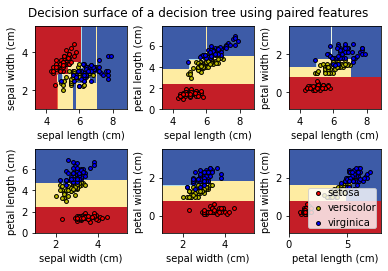

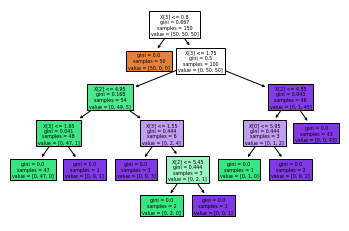

In [11]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()